In [ ]:
import torch
import torch.nn as nn
import numpy as np

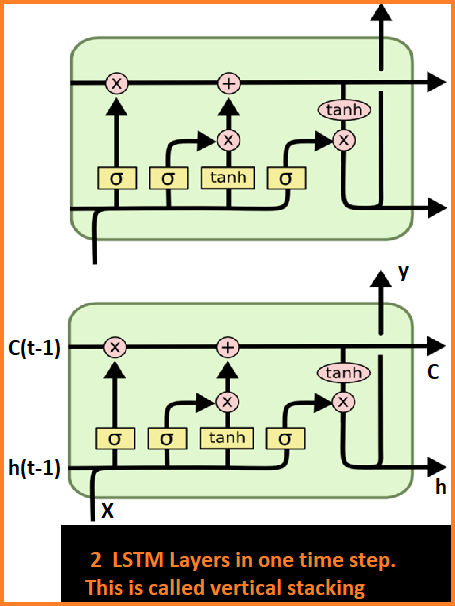

# Input Parameters of LSTM Layer

### nn.LSTM( input_size, hidden_size, num_layers, batch_first = True )

***input_size = The number of expected features in the input. Feature dimension***

***hidden_size = Number of units in the hidden state. The number of features in the hidden state h***

***num_layers = Number of vertical stacks of hidden layers***

***batch_first = True, it means input shape of the data to the LSTM is (batch_size, seq_len, features)***

# When batch_first = True.

In [ ]:
# Set the lSTM parameters

input_size  =  1
hidden_size = 16
num_layers  =  2

In [ ]:
# create an LSTM instance

lstmModel = nn.LSTM(input_size, hidden_size, num_layers, batch_first = True)
lstmModel

LSTM(1, 16, num_layers=2, batch_first=True)

In [ ]:
# Set the data parameters
seqlength = 5 # sequence length or timesteps
batchsize = 2 # Batch size or Number of samples

# create some random data
X = torch.rand(batchsize, seqlength, input_size) # Because batch_first is true, therefore (N,T,D)
                                                 # N = Batch size or Number of samples
                                                 # T = sequence length or timesteps
                                                 # D = Feature Dimension or Inputsize

# Initialized hidden states as zeros

H = torch.zeros(num_layers,batchsize,hidden_size)
C = torch.zeros(num_layers,batchsize,hidden_size)


# The hidden input is actually a tuple of (hidden, cell)

hidden_inputs = (H,C)


y,(h,c) = lstmModel(X, hidden_inputs)

print(f'Input shape: {list(X.shape)}')     # Batchsize x seqlen x feature dim  OR N x T x D
print(f'Hidden shape: {list(h.shape)}')    # numlayers x Batchsize x hiddensize
print(f'Cell memory shape: {list(c.shape)}')      # numlayers x Batchsize x hiddensize
print(f'Output shape: {list(y.shape)}')    # Batchsize x seqlen x hiddensize (features in hidden state)

Input shape: [2, 5, 1]
Hidden shape: [2, 2, 16]
Cell memory shape: [2, 2, 16]
Output shape: [2, 5, 16]


###  When batch_first = True (Example)

In [ ]:
lstmNet = nn.LSTM(10, 20, 2, batch_first = True)  # input_size, hidden_size, num_layers. Here batch_first = True
X = torch.randn(3, 5, 10) # Batchsize x seqlen x feature dimension
print(lstmNet)
print(" ")
print(X.shape)

LSTM(10, 20, num_layers=2, batch_first=True)
 
torch.Size([3, 5, 10])


In [ ]:
H = torch.randn(2, 3, 20)   # num_layer, batchsize, hiddensize
C = torch.randn(2, 3, 20)
y, (h, c) = lstmNet(X, (H, C))

In [ ]:
print(h.shape)  # num_layers x Batchsize x hiddensize
print(" ")
print(c.shape)
print(" ")
print(y.shape) # Batchsize x seqlen x hiddensize

torch.Size([2, 3, 20])
 
torch.Size([2, 3, 20])
 
torch.Size([3, 5, 20])


# When batch_first = False (default setting)

In [ ]:
input_size  =  4
hidden_size = 16
num_layers  =  2

# create an LSTM instance
lstm = nn.LSTM(input_size, hidden_size, num_layers) # default batch_first = False
lstm

LSTM(4, 16, num_layers=2)

In [ ]:
# Set data parameters
seqlength = 5 # sequence length or timesteps
batchsize = 3 # Batch size or Number of samples

# Create some data
X = torch.rand(seqlength, batchsize, input_size)

# Create initial hidden states (typically initialized as zeros)

H = torch.zeros(num_layers,batchsize,hidden_size)
C = torch.zeros(num_layers,batchsize,hidden_size)

# the input is actually a tuple of (hidden,cell)
hidden_inputs = (H,C)

# run some data through the model and show the output sizes
y, (h,c) = lstm(X, hidden_inputs)
print(f'Input shape: {list(X.shape)}')    # seqlength x Batchsize x feature dimension
print(f'Hidden shape: {list(h.shape)}')   # numlayers x Batchsize x hiddensize
print(f'Cell memory shape: {list(c.shape)}')     # numlayers x Batchsize x hiddensize
print(f'Output shape: {list(y.shape)}')   # seqlen x Batchsize x hiddensize

Input shape: [5, 3, 4]
Hidden shape: [2, 3, 16]
Cell memory shape: [2, 3, 16]
Output shape: [5, 3, 16]


### When batch_first = False (Example)

In [ ]:
lstmModel = nn.LSTM(10, 20, 2)  # input_size, hidden_size, num_layers. Here batch_first = False
X = torch.randn(5, 3, 10) # seqlength x Batchsize x feature dimension
print(lstmModel)
print(" ")
print(X.shape)

LSTM(10, 20, num_layers=2)
 
torch.Size([5, 3, 10])


In [ ]:
H = torch.randn(2, 3, 20)   # num_layer, batchsize, hiddensize
C = torch.randn(2, 3, 20)
y, (h, c) = lstmModel(X, (H, C))

In [ ]:
print(h.shape)  # num_layers, batch, hidden
print(" ")
print(c.shape)
print(" ")
print(y.shape) # seqlen, batch, hidden

torch.Size([2, 3, 20])
 
torch.Size([2, 3, 20])
 
torch.Size([5, 3, 20])
